# Import Libraries

In [151]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

In [152]:
df = pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
print(df.shape)

(20491, 2)


# Index the CSV data (If not present already)

In [153]:
df.insert(0, 'Index', range(1, len(df) + 1))
df.to_csv('file_with_index.csv', index=False)

In [154]:
df = df.head(500)
print(df.shape)

(500, 3)


In [155]:
df.head()

,Index,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,"unique, great stay, wonderful time hotel monac...",5
4,5,"great stay great stay, went seahawk game aweso...",5


## EDA

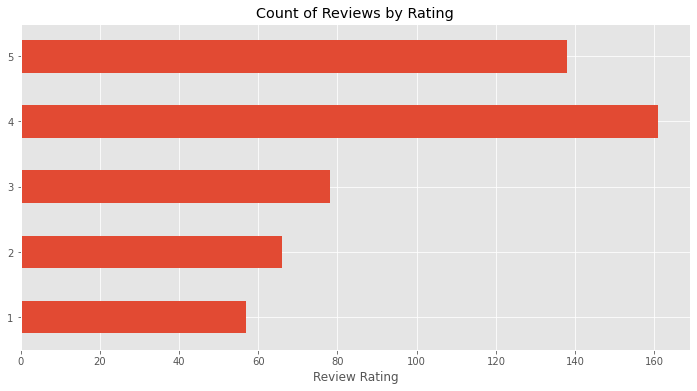

In [156]:
plt.style.use('ggplot')

ax = df['Rating'].value_counts().sort_index().plot(kind='barh',title='Count of Reviews by Rating',figsize=(12, 6))
ax.set_xlabel('Review Rating')
plt.show()

## Implementing NLTK

In [157]:
random = df['Review'][93]
print(random)

comfortable apt.-style hotel enjoyable stay price amenities, european-style hotel, building old furniture classic style comfortable, no a/c upper floors able open windows, terrific grocery nearby metropolitan market good restaurants, seattle center space needle experience music project science center, far pike market waterfront inn shuttle available day, parking tight, limited hotel spaces usually parking street fee 1-2 hours, parking 6 p.m. free streets car 8 amreported slow toilet fixed immediately, staff responsive,  


In [158]:
tokens = nltk.word_tokenize(random)
tokens[:10]

['comfortable',
 'apt.-style',
 'hotel',
 'enjoyable',
 'stay',
 'price',
 'amenities',
 ',',
 'european-style',
 'hotel']

In [159]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('comfortable', 'JJ'),
 ('apt.-style', 'JJ'),
 ('hotel', 'NN'),
 ('enjoyable', 'JJ'),
 ('stay', 'JJ'),
 ('price', 'NN'),
 ('amenities', 'NNS'),
 (',', ','),
 ('european-style', 'JJ'),
 ('hotel', 'NN')]

In [160]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  comfortable/JJ
  apt.-style/JJ
  hotel/NN
  enjoyable/JJ
  stay/JJ
  price/NN
  amenities/NNS
  ,/,
  european-style/JJ
  hotel/NN
  ,/,
  building/VBG
  old/JJ
  furniture/NN
  classic/JJ
  style/NN
  comfortable/NN
  ,/,
  no/DT
  a/c/JJ
  upper/JJ
  floors/NNS
  able/JJ
  open/JJ
  windows/NNS
  ,/,
  terrific/JJ
  grocery/NN
  nearby/JJ
  metropolitan/JJ
  market/NN
  good/JJ
  restaurants/NNS
  ,/,
  seattle/RB
  center/JJ
  space/NN
  needle/JJ
  experience/NN
  music/NN
  project/NN
  science/NN
  center/NN
  ,/,
  far/RB
  pike/JJ
  market/NN
  waterfront/NN
  inn/JJ
  shuttle/NN
  available/JJ
  day/NN
  ,/,
  parking/VBG
  tight/NN
  ,/,
  limited/JJ
  hotel/NN
  spaces/NNS
  usually/RB
  parking/VBG
  street/NN
  fee/JJ
  1-2/JJ
  hours/NNS
  ,/,
  parking/VBG
  6/CD
  p.m./NN
  free/JJ
  streets/NNS
  car/NN
  8/CD
  amreported/VBD
  slow/JJ
  toilet/NN
  fixed/VBN
  immediately/RB
  ,/,
  staff/NN
  responsive/NN
  ,/,)


# Implementing VADER

In [161]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [162]:
sia.polarity_scores('What the hell is this??')

{'neg': 0.554, 'neu': 0.446, 'pos': 0.0, 'compound': -0.7149}

In [163]:
sia.polarity_scores('Ah! This looks cool.')

{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.3802}

In [164]:
sia.polarity_scores(random)

{'neg': 0.048, 'neu': 0.703, 'pos': 0.249, 'compound': 0.9531}

# Use TQDM to visualize processing

In [165]:
from tqdm.notebook import tqdm

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Index']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [166]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Index']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [167]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Index'})
vaders = vaders.merge(df, how='left')

In [168]:
vaders.head()

,Index,neg,neu,pos,compound,Review,Rating
0,1,0.072,0.643,0.285,0.9747,nice hotel expensive parking got good deal sta...,4
1,2,0.110,0.701,0.189,0.9787,ok nothing special charge diamond member hilto...,2
2,3,0.081,0.700,0.219,0.9889,nice rooms not 4* experience hotel monaco seat...,3
3,4,0.060,0.555,0.385,0.9912,"unique, great stay, wonderful time hotel monac...",5
4,5,0.135,0.643,0.221,0.9797,"great stay great stay, went seahawk game aweso...",5


## Plot VADER results

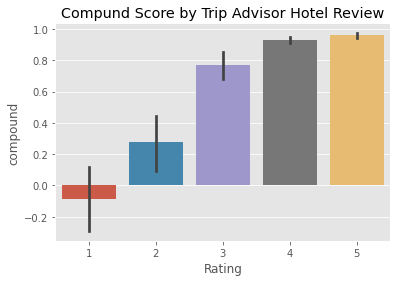

In [169]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by Trip Advisor Hotel Review')
plt.show()